In [10]:
# %%time
dataset_name = "W29_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list


# BES_reduced_with_na.index = BES_Panel.index
# BES_reduced_with_na.to_pickle(BES_data_folder+dataset_name+os.sep+"BES_reduced_with_na.zip",compression='zip')

Toggle code

var_type (474, 13)


In [11]:

# BES_Panel = pd.read_stata(fn)

In [12]:
# import pandas as pd
fn = "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W29_comb\\BES2024_W29_Panel_v29A.0.dta"
itr = pd.read_stata(fn, iterator=True)
col_var = itr.variable_labels()

In [13]:
cols = [x for x in list(col_var.keys()) if "oslaua" not in x]

In [17]:
cols = [k for k,v in col_var.items() if ("immig" in k) or ("wt" in k)]

In [45]:
wave_to_date = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"]

In [55]:
wave_to_date[26] = "Apr-24"
wave_to_date[27] = "May-24"
wave_to_date[28] = "Jun-24"
wave_to_date[29] = "Jul-24"


In [18]:
BES_Panel = pd.read_stata(fn,columns = cols)

immigSelfW7     30895
immigSelfW8     33501
immigSelfW9     30035
immigSelfW10    30236
immigSelfW11    30956
immigSelfW12     8984
immigSelfW13     1289
immigSelfW14    31063
immigSelfW15    30842
immigSelfW16    37959
immigSelfW17    34365
immigSelfW20    31468
immigSelfW21    30281
immigSelfW22    28113
immigSelfW23    30949
immigSelfW25    30407
immigSelfW26    30064
immigSelfW27    30445
immigSelfW28    31582
immigSelfW29    31098
dtype: int64

In [24]:
wave_to_wt = {int(v.split("W")[1].split("_result")[0]):v for v in search(BES_Panel,"(wt_new_W\d+|wt_full_W\d)($|_result)").index}

In [ ]:
search(BES_Panel,"immigSelf")

In [26]:
wave_to_immig = {int(v.split("W")[1]):v for v in search(BES_Panel,"immigSelf").index}

In [27]:
wave_to_immig

{7: 'immigSelfW7',
 8: 'immigSelfW8',
 9: 'immigSelfW9',
 10: 'immigSelfW10',
 11: 'immigSelfW11',
 12: 'immigSelfW12',
 13: 'immigSelfW13',
 14: 'immigSelfW14',
 15: 'immigSelfW15',
 16: 'immigSelfW16',
 17: 'immigSelfW17',
 20: 'immigSelfW20',
 21: 'immigSelfW21',
 22: 'immigSelfW22',
 23: 'immigSelfW23',
 25: 'immigSelfW25',
 26: 'immigSelfW26',
 27: 'immigSelfW27',
 28: 'immigSelfW28',
 29: 'immigSelfW29'}

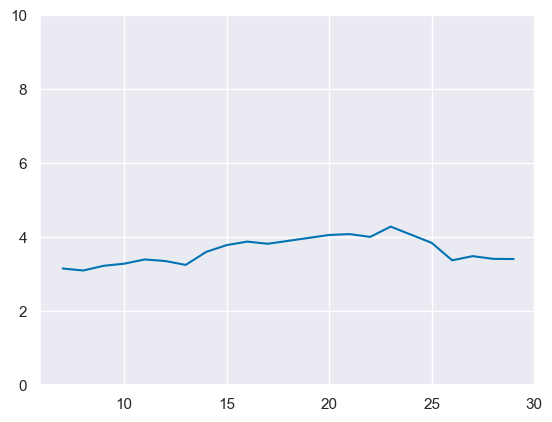

In [40]:
immig_ser = pd.Series(index = wave_to_immig.keys())
for wave in immig_ser.index:
    immig_ser.loc[wave] = BES_Panel[wave_to_immig[wave]].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).mean()
    
sns.lineplot(immig_ser);
plt.ylim([0,10]);

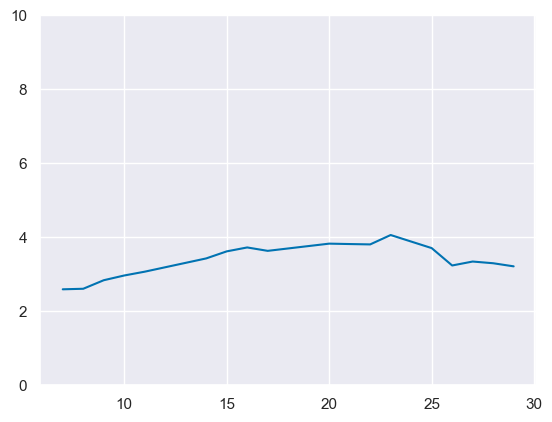

In [66]:
immig_ser = pd.Series(index = wave_to_immig.keys())
for wave in immig_ser.index:
    if wave in [12,13]:
        continue
    immig_ser.loc[wave] = ((BES_Panel[wave_to_immig[wave]].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))*BES_Panel[wave_to_wt[wave]]).mean()
    
sns.lineplot(immig_ser);
plt.ylim([0,10]);
immig_ser = immig_ser.reset_index()
immig_ser.columns = ["Date","Mean"]
immig_ser["Date"] = immig_ser["Date"].apply(lambda x: wave_to_date[x])

In [60]:
immig_ser

,Date,Mean
0,Apr-16,2.583885
1,May-16,2.598604
2,Jun-16,2.829474
3,Nov-16,2.957743
4,Apr-17,3.060669
5,May-17,3.215441
6,Jun-17,2.657700
7,May-18,3.419766
8,Mar-19,3.610317
9,May-19,3.716321


In [67]:
immig_ser["Date"] = immig_ser["Date"].apply(lambda x: pd.to_datetime(x,format="%b-%y"))

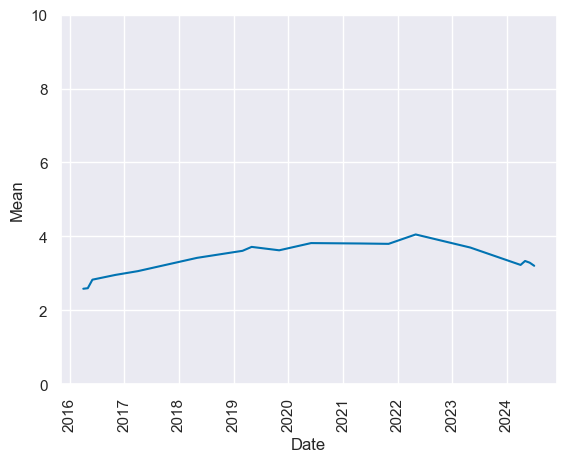

In [68]:
immig_ser
sns.lineplot(data=immig_ser,x="Date",y="Mean");
plt.ylim([0,10]);
plt.xticks(rotation=90);

In [65]:
wave_to_date[12],wave_to_date[13],
# v low sample size

('May-17', 'Jun-17')

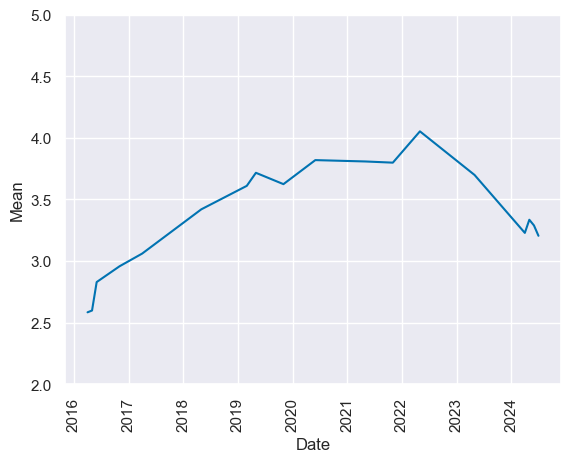

In [69]:
immig_ser
sns.lineplot(data=immig_ser,x="Date",y="Mean");
plt.ylim([2,5]);
plt.xticks(rotation=90);

In [ ]:
## try for different early means

In [73]:
immig_ser = immig_ser.dropna()

In [75]:
immig_ser[["Date_diff","Mean_diff"]] = immig_ser.diff().values

In [88]:
immig_ser["Mean_change_day"] = immig_ser.apply(lambda x: x["Mean_diff"]/x["Date_diff"].days if pd.notnull(x["Mean_diff"]) else 0,axis=1)


# immig_ser["Mean_diff"]/immig_ser["Date_diff"]

In [92]:
immig_ser["Mean_change_day_abs"] = immig_ser["Mean_change_day"].abs()

In [94]:
immig_ser.sort_values(by="Mean_diff")

,Date,Mean,Date_diff,Mean_diff,Mean_change_day,Mean_change_day_abs
16,2024-04-01,3.228596,336 days,-0.470157,-0.001399,0.001399
15,2023-05-01,3.698752,365 days,-0.353979,-0.000970,0.000970
10,2019-11-01,3.624232,184 days,-0.092089,-0.000500,0.000500
19,2024-07-01,3.205124,30 days,-0.083924,-0.002797,0.002797
18,2024-06-01,3.289048,31 days,-0.046129,-0.001488,0.001488
12,2021-05-01,3.808329,334 days,-0.011039,-0.000033,0.000033
13,2021-11-01,3.798664,184 days,-0.009665,-0.000053,0.000053
1,2016-05-01,2.598604,30 days,0.014719,0.000491,0.000491
4,2017-04-01,3.060669,151 days,0.102926,0.000682,0.000682
9,2019-05-01,3.716321,61 days,0.106004,0.001738,0.001738


In [93]:
immig_ser.sort_values(by="Mean_change_day_abs")

,Date,Mean,Date_diff,Mean_diff,Mean_change_day,Mean_change_day_abs
0,2016-04-01,2.583885,NaT,NaN,0.000000,0.000000
12,2021-05-01,3.808329,334 days,-0.011039,-0.000033,0.000033
13,2021-11-01,3.798664,184 days,-0.009665,-0.000053,0.000053
1,2016-05-01,2.598604,30 days,0.014719,0.000491,0.000491
10,2019-11-01,3.624232,184 days,-0.092089,-0.000500,0.000500
8,2019-03-01,3.610317,304 days,0.190551,0.000627,0.000627
4,2017-04-01,3.060669,151 days,0.102926,0.000682,0.000682
3,2016-11-01,2.957743,153 days,0.128269,0.000838,0.000838
7,2018-05-01,3.419766,395 days,0.359097,0.000909,0.000909
11,2020-06-01,3.819368,213 days,0.195136,0.000916,0.000916


In [ ]:
## biggest absolute shifts
#     - 2017->2018-05-01 +.35
#     - 2021->2022-05-01 +.25
#     - 2016->2016-06-01 +.23 (eu campaign)
#     - 2019->2020-06-01 +.195 
#     - 2018->2019-03-01 +.19 (before/after the eu elec BXP did well in?)

#     - 2022->2023-05-01 -.35
#     - 2023->2024-04-01 -.47

## by 'rate'


#     - 2016->2016-06-01 +.007/day (eu campaign)
#     - 2024-04-01->2024-05-01 +.0035
#     - 2024-06-01->2024-07-01 -.0028


In [219]:
wave_to_date[22]

'Nov-21'

In [98]:
immig_df = BES_Panel[[x for x in wave_to_immig.values() if x not in ["immigSelfW12","immigSelfW13"]]]

In [100]:
immig_df.describe()

,immigSelfW7,immigSelfW8,immigSelfW9,immigSelfW10,immigSelfW11,immigSelfW14,immigSelfW15,immigSelfW16,immigSelfW17,immigSelfW20,immigSelfW21,immigSelfW22,immigSelfW23,immigSelfW25,immigSelfW26,immigSelfW27,immigSelfW28,immigSelfW29
count,30895,33501,30035,30236,30956,31063,30842,37959,34365,31468,30281,28113,30949,30407,30064,30445,31582,31098
unique,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
top,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,5,5,5,5,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer
freq,8595,10052,8560,7743,7686,6826,6445,7946,7266,6889,5835,6178,5782,6992,8558,7783,9191,8836


In [ ]:
## maybe check out % of each response type?

In [242]:
immig_df_short = immig_df.reset_index().melt(id_vars = ["index"]).dropna()
immig_df_short = immig_df.reset_index().melt(id_vars=["index"]).dropna()
immig_df_short.columns = ["id","wave","value"]
immig_df_short["wave"] = immig_df_short["wave"].apply(lambda x: int(x.split("W")[1]))
immig_df_short["wt"] = immig_df_short.apply(lambda x: BES_Panel.loc[x["id"],wave_to_wt[x["wave"]]],axis=1)
immig_df_short["value_num"] = immig_df_short["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

0          Allow many fewer
1                         3
2                         3
5                         3
6          Allow many fewer
                 ...       
2136595                   5
2136596                   5
2136597                   5
2136598                   4
2136599                   6
Name: value, Length: 564259, dtype: category
Categories (12, object): ['Allow many fewer' < '1' < '2' < '3' ... '8' < '9' < 'Allow many more' < 'Don't know']

In [307]:
immig_df_short["date"] = immig_df_short["wave"].apply(lambda x: pd.to_datetime(wave_to_date[x],format="%b-%y"))

In [268]:
immig_df_short["value_seg"] = immig_df_short["value_num"].groupby(immig_df_short["wave"]).apply(lambda x: pd.qcut(x,q=3,duplicates='drop').cat.codes.replace(-1,np.nan)  ).values

In [296]:
id_to_early_seg = pd.qcut(immig_df_short["value_seg"][immig_df_short["wave"].isin([7,8,9,10,11])].groupby(immig_df_short["id"]).mean(),q=3).cat.codes.replace(-1,np.nan).to_dict()

In [297]:
immig_df_short["value_seg_early"] = immig_df_short["id"].apply(lambda x: id_to_early_seg[x] if x in id_to_early_seg.keys() else np.nan)

In [298]:
immig_df_short

,id,wave,value,wt,value_num,value_seg,value_seg_early
0,0,7,Allow many fewer,1.407584,0.0,0.0,0.0
1,1,7,3,1.193967,3.0,1.0,1.0
2,2,7,3,0.546880,3.0,1.0,1.0
5,5,7,3,0.184099,3.0,1.0,1.0
6,6,7,Allow many fewer,0.611095,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2136595,118695,29,5,0.801331,5.0,1.0,NaN
2136596,118696,29,5,0.188099,5.0,1.0,NaN
2136597,118697,29,5,0.546307,5.0,1.0,NaN
2136598,118698,29,4,0.593899,4.0,1.0,NaN


In [246]:
immig_df_short.groupby("wave").apply(lambda x: x.quantile())

,id,wave,value,wt,value_num
0,0,7,Allow many fewer,1.407584,0.0
1,1,7,3,1.193967,3.0
2,2,7,3,0.546880,3.0
5,5,7,3,0.184099,3.0
6,6,7,Allow many fewer,0.611095,0.0
...,...,...,...,...,...
2136595,118695,29,5,0.801331,5.0
2136596,118696,29,5,0.188099,5.0
2136597,118697,29,5,0.546307,5.0
2136598,118698,29,4,0.593899,4.0


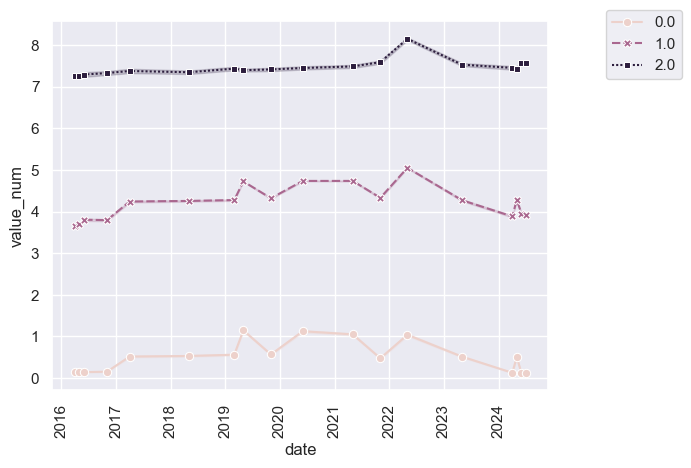

In [313]:
sns.lineplot(data=immig_df_short,x="date",y="value_num",weights="wt",hue="value_seg",style="value_seg",markers=True);
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.xticks(rotation=90);

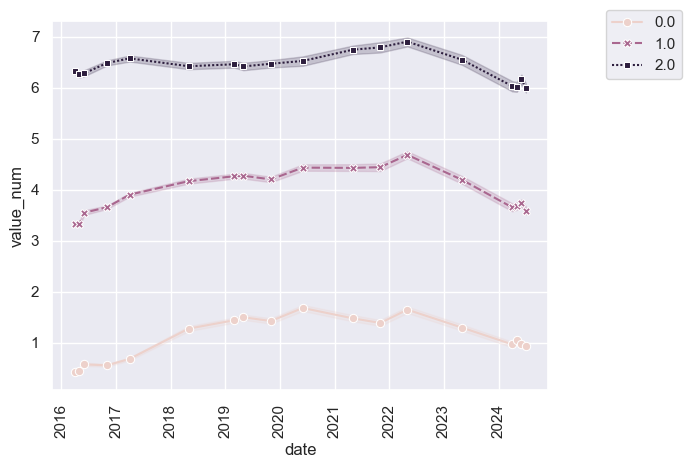

In [312]:
sns.lineplot(data=immig_df_short,x="date",y="value_num",weights="wt",hue="value_seg_early",style="value_seg_early",markers=True);
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.xticks(rotation=90);

## most positive group actually ends net lower - I guess from symmetry/flow between groups

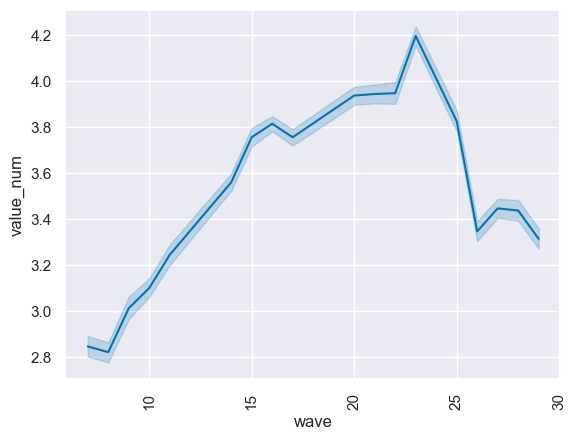

In [314]:
sns.lineplot(data=immig_df_short,x="wave",y="value_num",weights="wt",markers=True);
plt.xticks(rotation=90);

In [ ]:
# redo with your clustering into 0-2?3-4 /5/6-10/dk

In [106]:
immig_df_long = immig_df.reset_index().melt(id_vars=["index"]).dropna()
immig_df_long.columns = ["id","wave","value"]
immig_df_long["wave"] = immig_df_long["wave"].apply(lambda x: int(x.split("W")[1]))
immig_df_long["wt"] = immig_df_long.apply(lambda x: BES_Panel.loc[x["id"],wave_to_wt[x["wave"]]],axis=1)
immig_cats = immig_df_long["value"].cat.categories

In [238]:
immig_df_long

,id,wave,wt,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know
0,0,7,1.407584,True,False,False,False,False,False,False,False,False,False,False,False
1,1,7,1.193967,False,False,False,True,False,False,False,False,False,False,False,False
2,2,7,0.546880,False,False,False,True,False,False,False,False,False,False,False,False
5,5,7,0.184099,False,False,False,True,False,False,False,False,False,False,False,False
6,6,7,0.611095,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136595,118695,29,0.801331,False,False,False,False,False,True,False,False,False,False,False,False
2136596,118696,29,0.188099,False,False,False,False,False,True,False,False,False,False,False,False
2136597,118697,29,0.546307,False,False,False,False,False,True,False,False,False,False,False,False
2136598,118698,29,0.593899,False,False,False,False,True,False,False,False,False,False,False,False


In [159]:
# sns.lineplot(data=immig_df_long,x="wave",hue="value",weight="wt")

In [135]:
immig_df_long = pd.get_dummies(immig_df_long,prefix="",prefix_sep="")

In [146]:
immig_df_very_long = immig_df_long.melt(id_vars = ['id', 'wave', 'wt',])

In [184]:
immig_df

,immigSelfW7,immigSelfW8,immigSelfW9,immigSelfW10,immigSelfW11,immigSelfW14,immigSelfW15,immigSelfW16,immigSelfW17,immigSelfW20,immigSelfW21,immigSelfW22,immigSelfW23,immigSelfW25,immigSelfW26,immigSelfW27,immigSelfW28,immigSelfW29
0,Allow many fewer,Allow many fewer,Allow many fewer,Allow many fewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,4,5,4,3,3,NaN,NaN,5,4,5,5,5,NaN,NaN,4,NaN,NaN
2,3,NaN,NaN,5,5,5,5,7,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
118696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
118697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
118698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [182]:
# sns.lineplot(data=[0:10000],x="wave",weights="wt",y="value",hue="variable")

In [152]:
immig_var_averages = immig_df_very_long.groupby(["wave","variable"]).apply(lambda x: np.mean(x["value"].astype(float)*x["wt"])).reset_index()

In [157]:
immig_var_averages["date"] = immig_var_averages["wave"].apply(lambda x: pd.to_datetime(wave_to_date[x],format="%b-%y") )
                                 
                                 

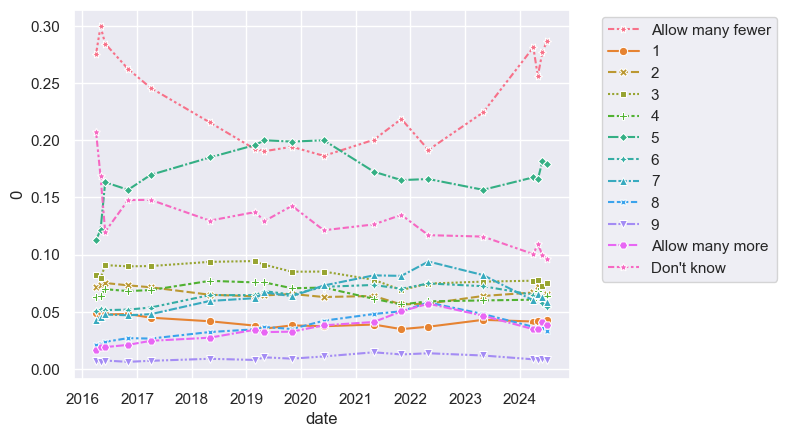

In [166]:
sns.lineplot(data=immig_var_averages,
             x="date",y=0,hue="variable",hue_order = immig_cats,style="variable",markers=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
## many diff trends

# (1) 'Allow many fewer' Clown Smile
# (2) Meh/DK switcheroo run up to eu ref, rise and fall ~mirroring Clown Smile
# (3) DK linear fall after switcheroo
# (4) 7/8/Allow many more linear rise with fall after 2022

In [175]:
immig_var_averages

,wave,variable,0,date
0,7,1,0.048928,2016-04-01
1,7,2,0.072062,2016-04-01
2,7,3,0.081710,2016-04-01
3,7,4,0.063015,2016-04-01
4,7,5,0.113013,2016-04-01
...,...,...,...,...
211,29,8,0.032953,2024-07-01
212,29,9,0.007850,2024-07-01
213,29,Allow many fewer,0.286559,2024-07-01
214,29,Allow many more,0.038057,2024-07-01


In [180]:
immig_var_averages.pivot_table(values=0, index='wave', columns='variable').corr()[immig_cats].loc[immig_cats]

variable,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know
Allow many fewer,1.000000,0.740391,0.662279,-0.230680,-0.317549,-0.633521,-0.794490,-0.670929,-0.640953,-0.675585,-0.500703,0.071620
1,0.740391,1.000000,0.867848,0.205139,-0.015312,-0.752952,-0.780366,-0.761531,-0.756745,-0.688306,-0.768516,0.483420
2,0.662279,0.867848,1.000000,0.402067,0.276580,-0.473996,-0.778832,-0.851046,-0.876958,-0.791140,-0.881675,0.373450
3,-0.230680,0.205139,0.402067,1.000000,0.905859,0.299429,-0.255528,-0.479353,-0.503331,-0.420289,-0.618844,0.284776
4,-0.317549,-0.015312,0.276580,0.905859,1.000000,0.504044,-0.116318,-0.361235,-0.422945,-0.376420,-0.480577,0.105436
5,-0.633521,-0.752952,-0.473996,0.299429,0.504044,1.000000,0.475108,0.373791,0.356989,0.285067,0.374793,-0.590403
6,-0.794490,-0.780366,-0.778832,-0.255528,-0.116318,0.475108,1.000000,0.925580,0.900920,0.876157,0.797931,-0.405393
7,-0.670929,-0.761531,-0.851046,-0.479353,-0.361235,0.373791,0.925580,1.000000,0.987365,0.934062,0.940249,-0.482505
8,-0.640953,-0.756745,-0.876958,-0.503331,-0.422945,0.356989,0.900920,0.987365,1.000000,0.926951,0.953708,-0.483743
9,-0.675585,-0.688306,-0.791140,-0.420289,-0.376420,0.285067,0.876157,0.934062,0.926951,1.000000,0.814887,-0.315063


In [181]:
# looking at correlation over waves

# Fewer - 0/1/2
# Slightly Fewer - 3/4

# More - 6?/7/8/9/10


In [186]:
immig_df.notnull().sum()

# parse every adjacent pair
# make destination count (include nans just in case)

# result_df transition matrix *for each pair*

# test build for one pair


immigSelfW7     30895
immigSelfW8     33501
immigSelfW9     30035
immigSelfW10    30236
immigSelfW11    30956
immigSelfW14    31063
immigSelfW15    30842
immigSelfW16    37959
immigSelfW17    34365
immigSelfW20    31468
immigSelfW21    30281
immigSelfW22    28113
immigSelfW23    30949
immigSelfW25    30407
immigSelfW26    30064
immigSelfW27    30445
immigSelfW28    31582
immigSelfW29    31098
dtype: int64

In [189]:
var1 = "immigSelfW23"
var2 = "immigSelfW25"


pd.crosstab(immig_df[var2],immig_df[var1],dropna=False)

immigSelfW23,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know
immigSelfW25,,,,,,,,,,,,
NaN,1894,412,631,819,640,1877,971,1311,815,226,819,985
Allow many fewer,3164,410,392,303,113,211,29,21,12,3,17,207
1,214,172,187,144,63,62,18,9,8,2,1,29
2,168,80,266,311,166,195,40,26,9,2,3,45
3,99,58,180,342,275,339,93,41,18,4,6,81
4,26,22,53,172,229,380,126,75,17,3,3,73
5,56,16,54,160,246,1432,454,415,144,15,43,241
6,14,7,17,50,59,308,371,377,137,18,30,55
7,11,5,6,17,17,205,227,537,340,62,93,43


In [196]:
pd.crosstab(immig_df[var2],immig_df[var1],margins=True,normalize='columns')*100

immigSelfW23,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know,All
immigSelfW25,,,,,,,,,,,,,
Allow many fewer,81.378601,52.229299,32.612313,19.250318,9.149798,6.098266,1.912929,1.126005,1.043478,1.079137,1.833873,12.402636,24.973144
1,5.504115,21.910828,15.557404,9.148666,5.101215,1.791908,1.187335,0.482574,0.695652,0.719424,0.107875,1.737567,4.649854
2,4.320988,10.191083,22.129784,19.758577,13.441296,5.635838,2.638522,1.394102,0.782609,0.719424,0.323625,2.696225,6.706225
3,2.546296,7.388535,14.975042,21.728081,22.267206,9.797688,6.134565,2.198391,1.565217,1.438849,0.647249,4.853206,7.857179
4,0.668724,2.802548,4.409318,10.927573,18.542510,10.982659,8.311346,4.021448,1.478261,1.079137,0.323625,4.373877,6.030999
5,1.440329,2.038217,4.492512,10.165184,19.919028,41.387283,29.947230,22.252011,12.521739,5.395683,4.638619,14.439784,16.757890
6,0.360082,0.891720,1.414309,3.176620,4.777328,8.901734,24.472296,20.214477,11.913043,6.474820,3.236246,3.295386,7.381452
7,0.282922,0.636943,0.499168,1.080051,1.376518,5.924855,14.973615,28.793566,29.565217,22.302158,10.032362,2.576393,7.995294
8,0.102881,0.127389,0.499168,0.571792,0.242915,1.820809,4.617414,11.903485,24.086957,24.100719,15.210356,1.617735,4.552663


In [ ]:
# DK ->5, but not much 5-> DK
# 

In [201]:
var1 = "immigSelfW23"
var2 = "immigSelfW25"

immig_dk_dest = pd.DataFrame()

for ind in range(0,len(immig_df.columns)-1):
    var1 = immig_df.columns[ind]
    var2 = immig_df.columns[ind+1]

    immig_dk_dest[var1+"->"+var2] = (pd.crosstab(immig_df[var2],immig_df[var1],margins=True,normalize='columns')*100)["Don't know"]

In [222]:
# immig_dk_dest.plot()

In [205]:
immig_dk_dest

,immigSelfW7->immigSelfW8,immigSelfW8->immigSelfW9,immigSelfW9->immigSelfW10,immigSelfW10->immigSelfW11,immigSelfW11->immigSelfW14,immigSelfW14->immigSelfW15,immigSelfW15->immigSelfW16,immigSelfW16->immigSelfW17,immigSelfW17->immigSelfW20,immigSelfW20->immigSelfW21,immigSelfW21->immigSelfW22,immigSelfW22->immigSelfW23,immigSelfW23->immigSelfW25,immigSelfW25->immigSelfW26,immigSelfW26->immigSelfW27,immigSelfW27->immigSelfW28,immigSelfW28->immigSelfW29
immigSelfW8,,,,,,,,,,,,,,,,,
Allow many fewer,16.926730,16.001535,9.228442,10.805776,11.590437,9.913793,10.419486,9.408495,8.990318,8.089608,9.828142,8.053007,12.402636,15.296640,7.323751,13.370998,11.064718
1,2.408412,1.995395,1.512859,1.630182,1.767152,1.346983,1.262968,2.024613,1.383126,1.244555,1.611171,1.172273,1.737567,2.287348,1.026694,1.381042,1.670146
2,4.206242,3.990790,2.420575,2.515137,3.222453,2.209052,2.706360,2.977372,2.766252,2.986932,2.201933,2.242610,2.696225,3.288063,1.711157,2.636535,2.922756
3,4.206242,6.139678,3.782148,3.912436,4.158004,4.364224,3.743798,3.811036,3.918857,3.733665,2.792696,3.516820,4.853206,5.218013,3.148528,3.264281,4.940849
4,3.527815,5.026861,4.009077,3.306940,4.677755,3.448276,3.518268,3.493450,3.734440,3.982576,2.792696,3.211009,4.373877,3.645461,3.969884,3.640929,4.453723
5,10.176391,16.423638,11.043873,11.364695,13.669439,12.661638,12.178620,11.830091,16.781927,13.192284,12.083781,15.698267,14.439784,14.653324,16.495551,17.011927,16.840640
6,2.340570,2.762855,2.571861,2.654867,3.118503,3.502155,2.706360,2.580389,3.918857,3.049160,3.276047,4.281346,3.295386,2.859185,3.080082,3.452605,2.922756
7,2.272727,3.683807,2.193646,2.468561,3.326403,2.370690,2.119982,1.945216,2.812356,2.675793,3.168636,4.179409,2.576393,2.215868,1.916496,1.820465,1.600557
8,1.051560,1.419800,0.756430,1.024686,1.143451,1.400862,1.262968,0.952759,1.751959,1.804605,1.879699,1.172273,1.617735,0.500357,1.095140,1.318267,0.626305


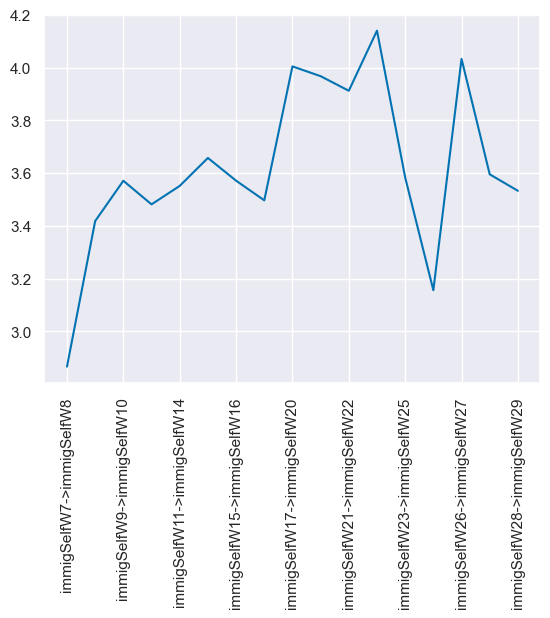

In [214]:
immig_dk_dest.drop("Don't know").apply(lambda x:np.sum((x*[0,1,2,3,4,5,6,7,8,9,10])/x.sum()),axis=0).plot();
plt.xticks(rotation=90);

In [220]:
var1 = "immigSelfW22"
var2 = "immigSelfW23"

pd.crosstab(immig_df[var2],immig_df[var1],dropna=False)

immigSelfW22,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know
immigSelfW23,,,,,,,,,,,,
NaN,1573,261,457,546,439,1276,628,763,486,134,441,874
Allow many fewer,3170,210,164,123,38,88,18,9,5,2,10,158
1,353,178,131,73,28,39,7,2,2,1,1,23
2,371,170,262,173,73,88,18,20,9,1,2,44
3,225,113,304,358,182,209,43,27,14,6,6,69
4,100,45,106,228,261,274,83,39,12,0,2,63
5,152,42,123,299,315,1616,365,230,75,6,25,308
6,19,10,30,64,92,509,381,275,77,16,17,84
7,18,8,19,43,54,342,364,660,274,36,79,82


In [221]:
pd.crosstab(immig_df[var2],immig_df[var1],margins=True,normalize='columns')*100

immigSelfW22,Allow many fewer,1,2,3,4,5,6,7,8,9,Allow many more,Don't know,All
immigSelfW23,,,,,,,,,,,,,
Allow many fewer,68.838219,25.990099,13.746857,8.535739,3.374778,2.459475,1.214575,0.518135,0.464253,0.778210,1.031992,8.053007,19.743020
1,7.665581,22.029703,10.980721,5.065926,2.486679,1.089994,0.472335,0.115141,0.185701,0.389105,0.103199,1.172273,4.141339
2,8.056460,21.039604,21.961442,12.005552,6.483126,2.459475,1.214575,1.151410,0.835655,0.389105,0.206398,2.242610,6.083519
3,4.885993,13.985149,25.481978,24.843858,16.163410,5.841252,2.901484,1.554404,1.299907,2.334630,0.619195,3.516820,7.689647
4,2.171553,5.569307,8.885163,15.822346,23.179396,7.657909,5.600540,2.245250,1.114206,0.000000,0.206398,3.211009,5.994564
5,3.300760,5.198020,10.310142,20.749480,27.975133,45.164897,24.628880,13.241220,6.963788,2.334630,2.579979,15.698267,17.573511
6,0.412595,1.237624,2.514669,4.441360,8.170515,14.225824,25.708502,15.831894,7.149489,6.225681,1.754386,4.281346,7.778601
7,0.390879,0.990099,1.592624,2.984039,4.795737,9.558413,24.561404,37.996546,25.441040,14.007782,8.152735,4.179409,9.780084
8,0.217155,0.371287,0.754401,1.387925,1.420959,3.661263,7.759784,17.386298,32.590529,33.073930,15.789474,1.172273,6.019274


In [ ]:
# looks like transfers for 5/DK/Allow Many Fewer seems to have a direct boost not to the obvious adjacency mechanism
# (although all do seem to be affected by 'general mood shift'/distance)

In [223]:
var1 = "immigSelfW22"
var2 = "immigSelfW23"

immig_dk_dest = pd.DataFrame()

for ind in range(0,len(immig_df.columns)-1):
    var1 = immig_df.columns[ind]
    var2 = immig_df.columns[ind+1]

    immig_dk_dest[var1+"->"+var2] = (pd.crosstab(immig_df[var2],immig_df[var1],margins=True,normalize='columns')*100)["Don't know"]

In [225]:
immig_dk_dest

,immigSelfW7->immigSelfW8,immigSelfW8->immigSelfW9,immigSelfW9->immigSelfW10,immigSelfW10->immigSelfW11,immigSelfW11->immigSelfW14,immigSelfW14->immigSelfW15,immigSelfW15->immigSelfW16,immigSelfW16->immigSelfW17,immigSelfW17->immigSelfW20,immigSelfW20->immigSelfW21,immigSelfW21->immigSelfW22,immigSelfW22->immigSelfW23,immigSelfW23->immigSelfW25,immigSelfW25->immigSelfW26,immigSelfW26->immigSelfW27,immigSelfW27->immigSelfW28,immigSelfW28->immigSelfW29
immigSelfW8,,,,,,,,,,,,,,,,,
Allow many fewer,16.926730,16.001535,9.228442,10.805776,11.590437,9.913793,10.419486,9.408495,8.990318,8.089608,9.828142,8.053007,12.402636,15.296640,7.323751,13.370998,11.064718
1,2.408412,1.995395,1.512859,1.630182,1.767152,1.346983,1.262968,2.024613,1.383126,1.244555,1.611171,1.172273,1.737567,2.287348,1.026694,1.381042,1.670146
2,4.206242,3.990790,2.420575,2.515137,3.222453,2.209052,2.706360,2.977372,2.766252,2.986932,2.201933,2.242610,2.696225,3.288063,1.711157,2.636535,2.922756
3,4.206242,6.139678,3.782148,3.912436,4.158004,4.364224,3.743798,3.811036,3.918857,3.733665,2.792696,3.516820,4.853206,5.218013,3.148528,3.264281,4.940849
4,3.527815,5.026861,4.009077,3.306940,4.677755,3.448276,3.518268,3.493450,3.734440,3.982576,2.792696,3.211009,4.373877,3.645461,3.969884,3.640929,4.453723
5,10.176391,16.423638,11.043873,11.364695,13.669439,12.661638,12.178620,11.830091,16.781927,13.192284,12.083781,15.698267,14.439784,14.653324,16.495551,17.011927,16.840640
6,2.340570,2.762855,2.571861,2.654867,3.118503,3.502155,2.706360,2.580389,3.918857,3.049160,3.276047,4.281346,3.295386,2.859185,3.080082,3.452605,2.922756
7,2.272727,3.683807,2.193646,2.468561,3.326403,2.370690,2.119982,1.945216,2.812356,2.675793,3.168636,4.179409,2.576393,2.215868,1.916496,1.820465,1.600557
8,1.051560,1.419800,0.756430,1.024686,1.143451,1.400862,1.262968,0.952759,1.751959,1.804605,1.879699,1.172273,1.617735,0.500357,1.095140,1.318267,0.626305


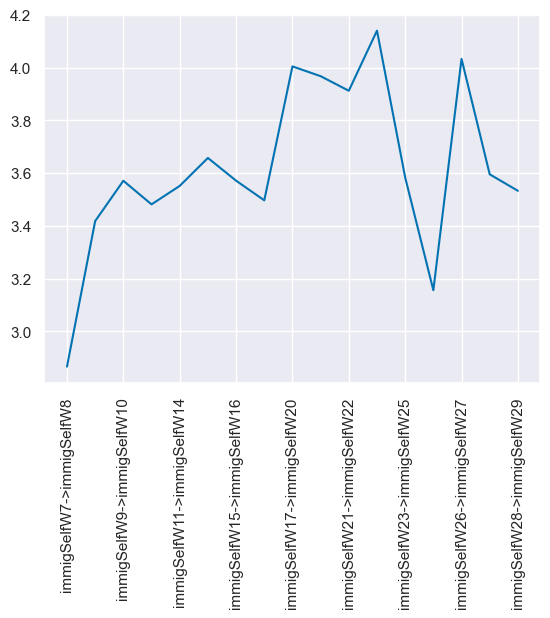

In [224]:
immig_dk_dest.drop("Don't know").apply(lambda x:np.sum((x*[0,1,2,3,4,5,6,7,8,9,10])/x.sum()),axis=0).plot();
plt.xticks(rotation=90);

In [226]:
BES_Panel["immigSelfW21"]

0         NaN
1           5
2         NaN
3         NaN
4         NaN
         ... 
118695    NaN
118696    NaN
118697    NaN
118698    NaN
118699    NaN
Name: immigSelfW21, Length: 118700, dtype: category
Categories (12, object): ['Allow many fewer' < '1' < '2' < '3' ... '8' < '9' < 'Allow many more' < 'Don't know']

In [234]:
var1 = "immigSelfW22"
var2 = "immigSelfW23"

pd.crosstab(immig_df[var2],immig_df[var1],dropna=True,
            normalize='columns'
           )["Allow many fewer"]

immigSelfW23
Allow many fewer    0.688382
1                   0.076656
2                   0.080565
3                   0.048860
4                   0.021716
5                   0.033008
6                   0.004126
7                   0.003909
8                   0.002172
9                   0.000869
Allow many more     0.003257
Don't know          0.036482
Name: Allow many fewer, dtype: float64

In [235]:
mask = BES_Panel["immigSelfW21"]=="Allow many fewer"

var1 = "immigSelfW22"
var2 = "immigSelfW23"

pd.crosstab(immig_df[var2][mask],immig_df[var1][mask],dropna=True,
            normalize='columns'
           )["Allow many fewer"]

immigSelfW23
Allow many fewer    0.809504
1                   0.056534
2                   0.054896
3                   0.024990
4                   0.008603
5                   0.016387
6                   0.001229
7                   0.001229
8                   0.001639
9                   0.000410
Allow many more     0.001639
Don't know          0.022941
Name: Allow many fewer, dtype: float64

In [236]:
mask = BES_Panel["immigSelfW21"]!="Allow many fewer"

var1 = "immigSelfW22"
var2 = "immigSelfW23"

pd.crosstab(immig_df[var2][mask],immig_df[var1][mask],dropna=True,
            normalize='columns'
           )["Allow many fewer"]

immigSelfW23
Allow many fewer    0.551756
1                   0.099353
2                   0.109519
3                   0.075786
4                   0.036506
5                   0.051756
6                   0.007394
7                   0.006932
8                   0.002773
9                   0.001386
Allow many more     0.005083
Don't know          0.051756
Name: Allow many fewer, dtype: float64

In [ ]:
## yep - sign of strong history effect